
# 💍 Marriage Data Analysis (India) — Comprehensive Visual Report

This notebook performs an exploratory data analysis (EDA) on **Indian marriage data** using **PySpark**, **Matplotlib**, and **Seaborn**.

### Key Features:
- Data loading and exploration using PySpark  
- Visual analysis of marriage trends and demographics  
- Bar, pie, scatter, histogram, boxplot, and heatmap visualizations  
- Insights into relationships between age, income, gender, and marriage type  

Run each cell to generate visuals and insights interactively.


In [1]:

%matplotlib inline
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, avg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("Marriage Analysis India - Final Version").getOrCreate()
print("Spark session created successfully.")


Spark session created successfully.


In [2]:

# Load dataset
df = spark.read.csv("marriage_data_india.csv", header=True, inferSchema=True)
df.printSchema()
df.show(5)
print("Total records:", df.count())


root
 |-- ID: integer (nullable = true)
 |-- Marriage_Type: string (nullable = true)
 |-- Age_at_Marriage: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Caste_Match: string (nullable = true)
 |-- Religion: string (nullable = true)
 |-- Parental_Approval: string (nullable = true)
 |-- Urban_Rural: string (nullable = true)
 |-- Dowry_Exchanged: string (nullable = true)
 |-- Marital_Satisfaction: string (nullable = true)
 |-- Divorce_Status: string (nullable = true)
 |-- Children_Count: integer (nullable = true)
 |-- Income_Level: string (nullable = true)
 |-- Years_Since_Marriage: integer (nullable = true)
 |-- Spouse_Working: string (nullable = true)
 |-- Inter-Caste: string (nullable = true)
 |-- Inter-Religion: string (nullable = true)

+---+-------------+---------------+------+---------------+-----------+--------+-----------------+-----------+---------------+--------------------+--------------+--------------+------

C:\Users\Admin\AppData\Local\Temp\ipykernel_16684\381647043.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Marriage_Type", y="count", data=marriage_counts, palette="viridis")


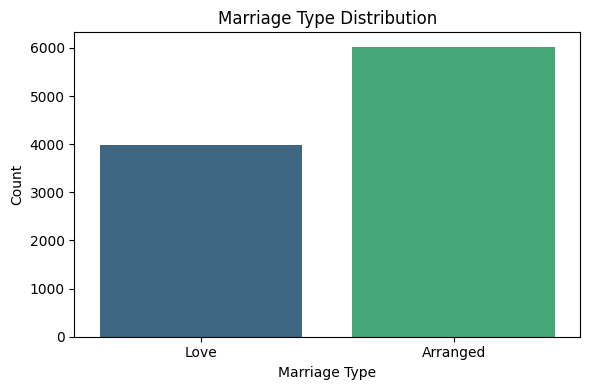

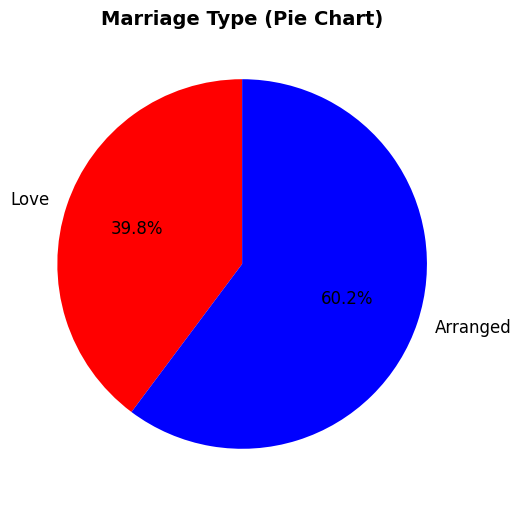

In [10]:
marriage_counts = df.groupBy("Marriage_Type").count().toPandas()

# Bar Chart
plt.figure(figsize=(6,4))
sns.barplot(x="Marriage_Type", y="count", data=marriage_counts, palette="viridis")
plt.title("Marriage Type Distribution")
plt.xlabel("Marriage Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Pie Chart with Red and Blue
plt.figure(figsize=(6,6))
colors = ["#FF0000", "#0000FF"]  # Red and Blue
plt.pie(
    marriage_counts["count"],
    labels=marriage_counts["Marriage_Type"],
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
    textprops={"fontsize": 12, "color": "black"}
)
plt.title("Marriage Type (Pie Chart)", fontsize=14, fontweight="bold")
plt.show()


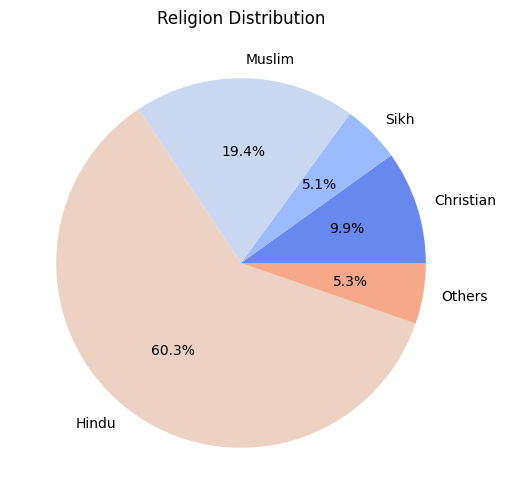

In [4]:

religion_counts = df.groupBy("Religion").count().toPandas()
plt.figure(figsize=(6,6))
plt.pie(religion_counts["count"], labels=religion_counts["Religion"], autopct="%1.1f%%", colors=sns.color_palette("coolwarm"))
plt.title("Religion Distribution")
plt.show()


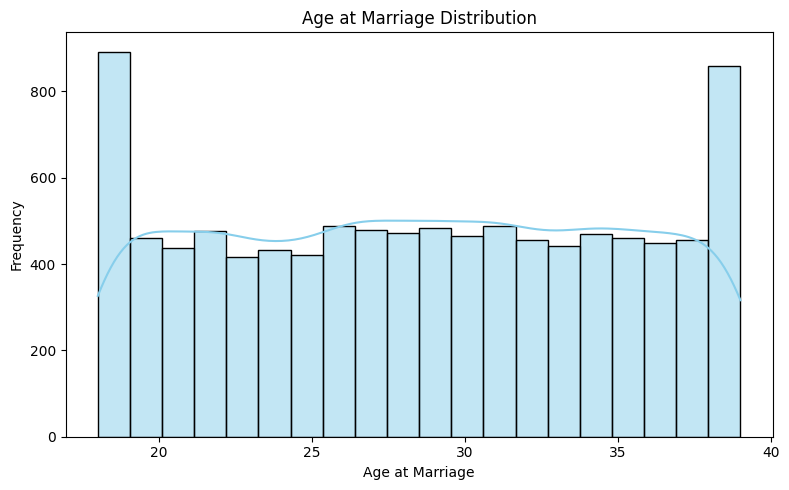

In [5]:

df_age_pd = df.select("Age_at_Marriage").dropna().toPandas()
plt.figure(figsize=(8,5))
sns.histplot(df_age_pd["Age_at_Marriage"], bins=20, kde=True, color="skyblue")
plt.title("Age at Marriage Distribution")
plt.xlabel("Age at Marriage")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


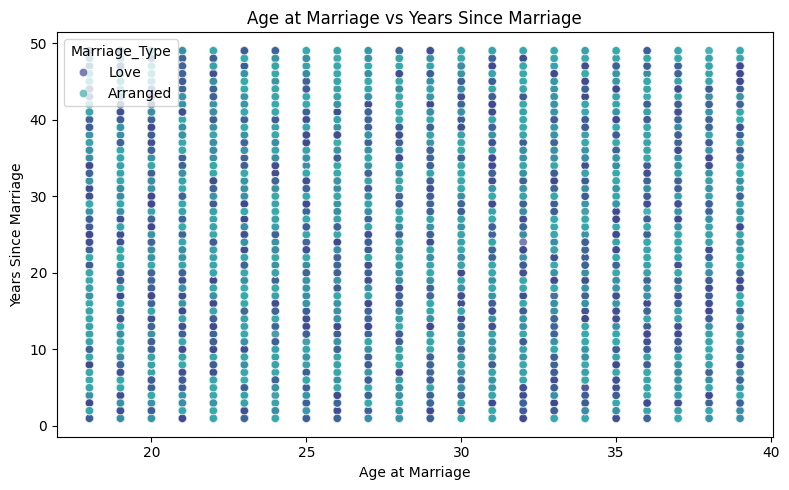

In [6]:

df_scatter_pd = df.select("Age_at_Marriage", "Years_Since_Marriage", "Marriage_Type").dropna().toPandas()
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_scatter_pd, x="Age_at_Marriage", y="Years_Since_Marriage", hue="Marriage_Type", palette="mako", alpha=0.7)
plt.title("Age at Marriage vs Years Since Marriage")
plt.xlabel("Age at Marriage")
plt.ylabel("Years Since Marriage")
plt.tight_layout()
plt.show()


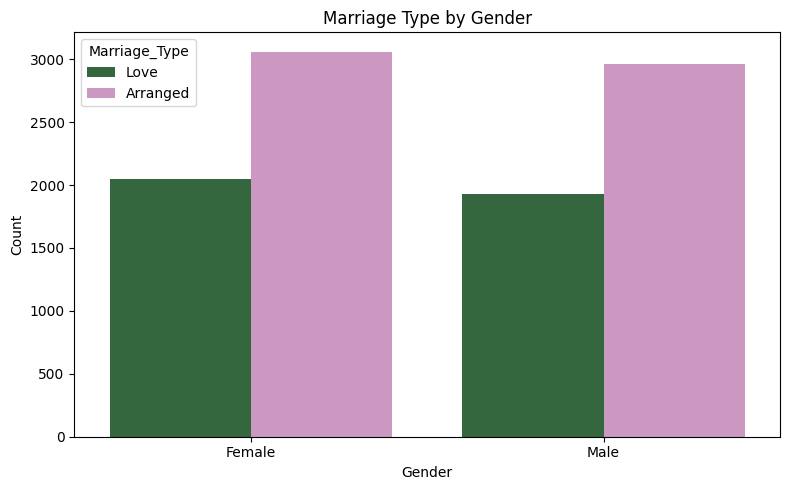

In [7]:

gender_marriage_pd = df.groupBy("Gender", "Marriage_Type").count().toPandas()
plt.figure(figsize=(8,5))
sns.barplot(x="Gender", y="count", hue="Marriage_Type", data=gender_marriage_pd, palette="cubehelix")
plt.title("Marriage Type by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_16684\1605786345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Income_Level", y="Children_Count", data=df_box_pd, palette="Set2")


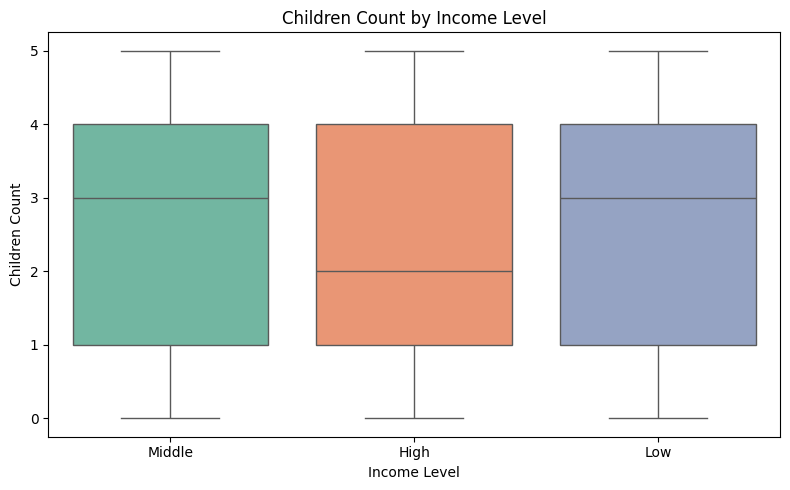

In [8]:

df_box_pd = df.select("Children_Count", "Income_Level").dropna().toPandas()
plt.figure(figsize=(8,5))
sns.boxplot(x="Income_Level", y="Children_Count", data=df_box_pd, palette="Set2")
plt.title("Children Count by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Children Count")
plt.tight_layout()
plt.show()


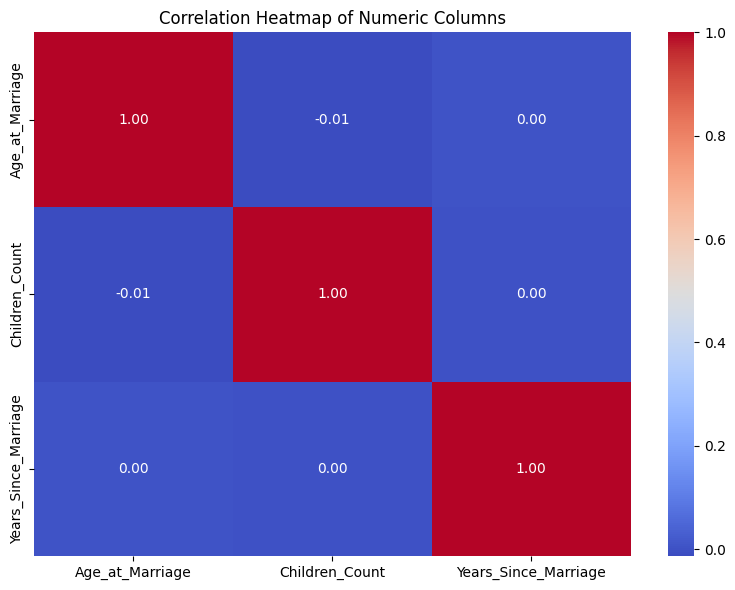

In [9]:

numeric_cols = ["Age_at_Marriage", "Children_Count", "Years_Since_Marriage"]
df_corr_pd = df.select(numeric_cols).toPandas().dropna()
plt.figure(figsize=(8,6))
sns.heatmap(df_corr_pd.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.tight_layout()
plt.show()
